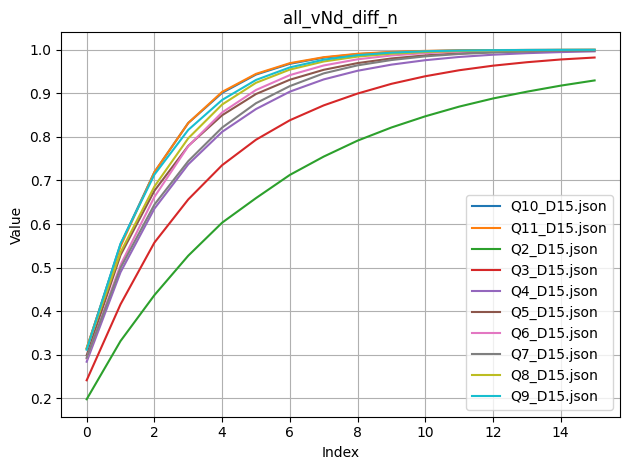

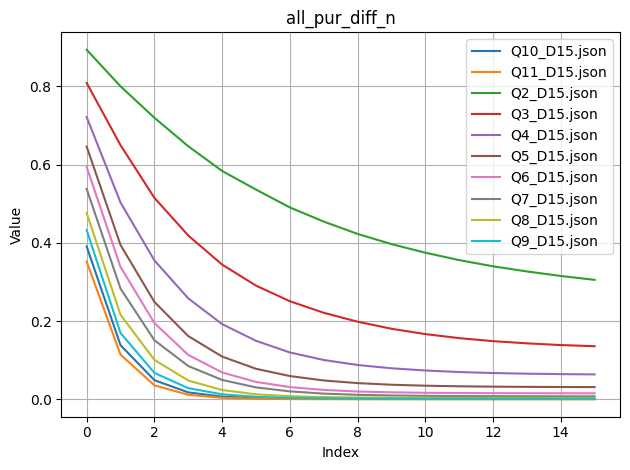

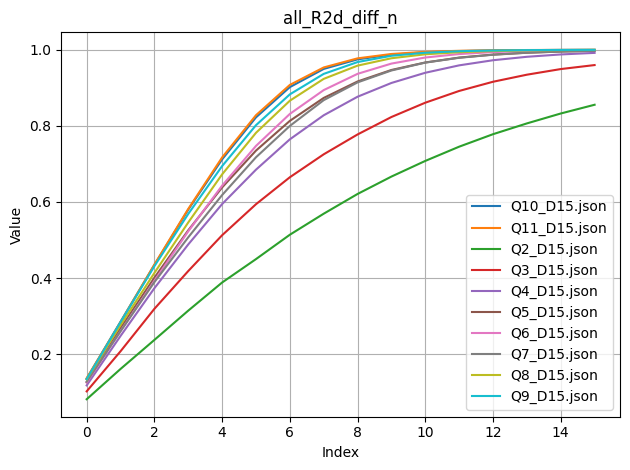

In [ ]:
import os
import json
import matplotlib.pyplot as plt

# Set directory with your JSON files
json_dir = "../"  # Change this to your actual path
json_files = [f for f in os.listdir(json_dir) if f.endswith(".json")]

# Dictionary to store all data by key
# Format: { "list_name": { "filename": [[values], [values], ...] } }
data_by_key = {}

for filename in json_files:
    path = os.path.join(json_dir, filename)
    with open(path, 'r') as file:
        try:
            content = json.load(file)
        except json.JSONDecodeError:
            print(f"Skipping invalid JSON file: {filename}")
            continue

        for key, lists in content.items():
            if not isinstance(lists, list):
                continue
            if key not in data_by_key:
                data_by_key[key] = {}
            data_by_key[key][filename] = lists

# Plot one graph per list name
for key, file_data in data_by_key.items():
    plt.figure()
    for fname, sequences in file_data.items():
        for i, seq in enumerate(sequences):
            label = f"{fname} [{i}]" if len(sequences) > 1 else fname
            plt.plot(seq, label=label)
    if key == "all_vNd_diff_n":
        title = "Von Neumann entropy density"
    elif if key == "all_pur_diff_n":
        title = "Purity"
    elif if key == "all_R2d_diff_n":
        title = "Renyi-2 entropy density"

    plt.title(title)
    plt.xlabel("Depth")
    plt.ylabel("Value")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()

plt.show()
